<a href="https://colab.research.google.com/github/tta2yta/failure-prediction-for-mechanized-oil-equipment/blob/feature-branch/final_code_file_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Importing neccessary library files</b>

In [44]:
import os, glob
import csv
import ntpath
from google.colab import drive
import glob
import seaborn as sns
import seaborn as sns1
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from matplotlib.pyplot import figure
import mplcursors
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve, precision_score, f1_score, roc_auc_score, auc

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Grouping samples into one day format

In [7]:
def make_date_samples(df):
  print("Checking Data type of columns and check for any null values")
  df['DateTime']= pd.to_datetime(df['DateTime'])
  df = df.set_index('DateTime') 
  df.columns=['Value']
  df = df.Value.resample('D').mean().dropna()
  df=df.reset_index()
  print(df)
  return  df

Function to find negative values and remove them if they exist

In [8]:
def negatives(df):
  print("negatives in data set")
  negative_df=df[df['Value'] < 0]
  print( negative_df.shape)
  print( negative_df.head())
  negative_df=df[df['Value'] >= 0]
  return negative_df

Function to identify consecutive zeros in the dataset and remove it if exists

In [9]:
# list_in=[]
def find_consective_zeros(df):
    list_in=[]
    if(len(df.Value.unique())==1):
      return df
    ctr_zeros=0
    for i in range (0, len(df.index)):
      if (df.iloc[i, 1]==0):
        if (i + 1 ==len(df.index) and ctr_zeros >=1):
            list_in.append(i)
            break
        elif (i + 1 == len(df.index)):
            break
        if (df.iloc[i+1, 1]==0 ):
            #print(df.iloc[[i]])
            list_in.append(i)
            ctr_zeros = ctr_zeros + 1
        elif (df.iloc[i+1, 1]!=0 and ctr_zeros >=1):
              list_in.append(i)
              ctr_zeros=0
      else:
       ctr_zeros=0
    # if (len(list_in)==0):
    #   return df_test.iloc[:]
    # else:
    indexes_to_keep = set(range(df.shape[0])) - set(list_in)
    res=df.iloc[list(indexes_to_keep),:]
    return res

Ploting Boxplot to identify outliers and probability density function 

In [15]:
def check_outlier(df):
  # print("Ploting Boxplot to identify outliers and probability density function  \n")
  # df.columns = df.columns.to_series().apply(lambda x: x.strip())
  # sns.boxplot(x=df[df.columns[1]])
  # ax = df.plot.kde()
  # sns.distplot(df[df.columns[1]], hist = False, kde = True,
  #                 kde_kws = {'linewidth': 3})
  # plt.show()
  plt.figure(figsize=(8,4))
  plt.plot(df.iloc[:,1], alpha=0.3)
  plt.legend(); plt.show() 
  print("\n")

Function to normilize dataset

In [11]:
def normalizer(df):
  scaler = MinMaxScaler()
  df[['Value']] = scaler.fit_transform(df[['Value']])
  return df

Function to check for null values

In [12]:
def check_nulls_dt(df):
  print("Checking Data type of columns and check for any null values")
  print(df.isnull().sum())
  print(df.dtypes)
  return  df.dropna()

In [17]:
file_path = glob.glob("/content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/*.csv", recursive=True)
input_data_Ya=[]
col_names=[]
df_joined = pd.DataFrame(columns=['DateTime', 'Value'])

Statistical data for Ya_675.<br>
This Step can be applied to all oil wells

File Name= /content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/1.csv

 Data Dimention Before Processing
(128614, 2)




No handles with labels found to put in legend.




negatives in data set
(0, 2)
Empty DataFrame
Columns: [DateTime, Value]
Index: []


Checking Data type of columns and check for any null values
      DateTime      Value
0   2016-01-01  42.531250
1   2016-01-02  42.777083
2   2016-01-03  42.982979
3   2016-01-04  39.385714
4   2016-01-05  21.283333
..         ...        ...
921 2018-12-27  58.940000
922 2018-12-28  58.517391
923 2018-12-29  56.389091
924 2018-12-30  58.325000
925 2018-12-31  58.400000

[926 rows x 2 columns]

 Normalize data

 Data Dimention After Processing
(926, 2)


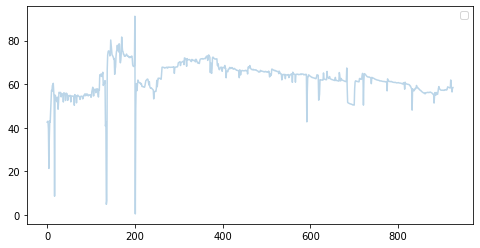







File Name= /content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/2.csv

 Data Dimention Before Processing
(177227, 2)




No handles with labels found to put in legend.




negatives in data set
(0, 2)
Empty DataFrame
Columns: [DateTime, Value]
Index: []


Checking Data type of columns and check for any null values
       DateTime       Value
0    2016-01-01   62.065217
1    2016-01-02   62.021739
2    2016-01-03   62.127660
3    2016-01-04   85.819048
4    2016-01-05  114.035714
...         ...         ...
1058 2018-12-27   93.087475
1059 2018-12-28   93.401404
1060 2018-12-29   93.495217
1061 2018-12-30   93.404790
1062 2018-12-31   93.377586

[1063 rows x 2 columns]

 Normalize data

 Data Dimention After Processing
(1063, 2)


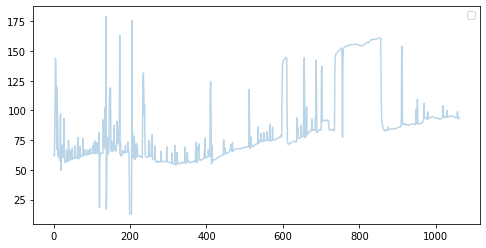







File Name= /content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/3.csv

 Data Dimention Before Processing
(442976, 2)




No handles with labels found to put in legend.




negatives in data set
(0, 2)
Empty DataFrame
Columns: [DateTime, Value]
Index: []


Checking Data type of columns and check for any null values
      DateTime      Value
0   2016-01-01  54.000000
1   2016-01-02  54.000000
2   2016-01-03  54.000000
3   2016-01-04  52.944333
4   2016-01-05  57.600000
..         ...        ...
921 2018-12-27  54.000000
922 2018-12-28  54.000000
923 2018-12-29  54.000000
924 2018-12-30  54.000000
925 2018-12-31  54.000000

[926 rows x 2 columns]

 Normalize data

 Data Dimention After Processing
(926, 2)


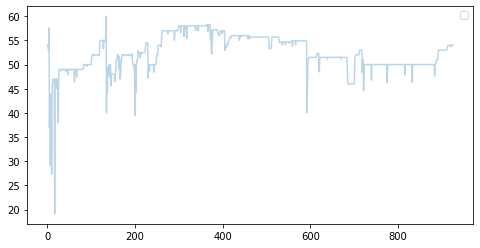







File Name= /content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/4.csv

 Data Dimention Before Processing
(293475, 2)




No handles with labels found to put in legend.




negatives in data set
(0, 2)
Empty DataFrame
Columns: [DateTime, Value]
Index: []


Checking Data type of columns and check for any null values
      DateTime      Value
0   2016-01-01  67.082822
1   2016-01-02  66.943750
2   2016-01-03  66.520376
3   2016-01-04  55.555556
4   2016-01-05  13.407895
..         ...        ...
919 2018-12-27  72.461538
920 2018-12-28  71.925926
921 2018-12-29  70.435897
922 2018-12-30  71.484848
923 2018-12-31  71.266667

[924 rows x 2 columns]

 Normalize data

 Data Dimention After Processing
(924, 2)


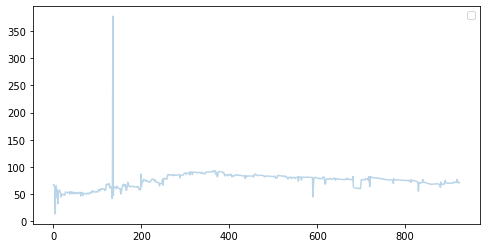







File Name= /content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/5.csv

 Data Dimention Before Processing
(58561, 2)




No handles with labels found to put in legend.




negatives in data set
(0, 2)
Empty DataFrame
Columns: [DateTime, Value]
Index: []


Checking Data type of columns and check for any null values
       DateTime      Value
0    2016-01-01  39.000000
1    2016-01-02  39.000000
2    2016-01-03  39.000000
3    2016-01-04  46.575758
4    2016-01-05  46.163043
...         ...        ...
1052 2018-12-27  49.000000
1053 2018-12-28  48.892857
1054 2018-12-29  48.594595
1055 2018-12-30  48.740741
1056 2018-12-31  48.684211

[1057 rows x 2 columns]

 Normalize data

 Data Dimention After Processing
(1057, 2)


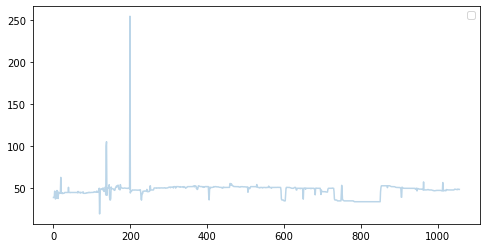







File Name= /content/drive/MyDrive/Colab Notebooks/final_project/data/Ya_675/6.csv

 Data Dimention Before Processing
(79114, 2)




No handles with labels found to put in legend.




negatives in data set
(0, 2)
Empty DataFrame
Columns: [DateTime, Value]
Index: []


Checking Data type of columns and check for any null values
       DateTime       Value
0    2016-01-01  366.093248
1    2016-01-02  369.050314
2    2016-01-03  370.619048
3    2016-01-04  371.839623
4    2016-01-05  375.858553
...         ...         ...
1076 2018-12-27  394.541667
1077 2018-12-28  392.909091
1078 2018-12-29  392.750000
1079 2018-12-30  391.782609
1080 2018-12-31  391.125000

[1081 rows x 2 columns]

 Normalize data

 Data Dimention After Processing
(1081, 2)


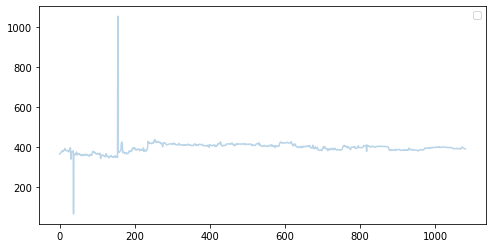







Number of Empty File: 0


In [18]:
ctr=0
for file_name in file_path:
      print("File Name=", file_name)
      file = open(file_name, encoding="utf8")
      reader = csv.reader(file)
      lines= len(list(reader))
      file.close()
      df = pd.read_csv(file_name, delimiter=";")
      df.columns = df.columns.str.strip()
      print("\n Data Dimention Before Processing")
      print(df.shape)
      print("\n")
      #removing consective zeros
      df_sliced= find_consective_zeros(df)
      print("\n")
      #checking and removing negative values
      df_sliced=negatives(df_sliced)
      print("\n")
      #checking Null, data types of fetures and grouping samples with on day format
      df_sliced=make_date_samples(df_sliced)

      #Normalize data
      print("\n Normalize data")
      # df_sliced=normalizer(df_sliced)

      print("\n Data Dimention After Processing")
      print(df_sliced.shape)
      #Ploting Boxplot to identify outliers and probability density function 
      check_outlier(df_sliced)
      print("\n")
      print("\n")
      input_data_Ya.append(df_sliced['Value'].tolist())
      col_names.append(ntpath.basename(file_name))
      df_joined=df_joined.merge(df_sliced, on='DateTime', how='outer')
      # df_temp=pd.concat([df_temp,df_sliced['Value']], axis=1) 
      if(lines==1):
        ctr += 1
        print(file_name, " ",lines)
        # os.remove(file_name)
print ("Number of Empty File:", ctr)

Loading the failures history file

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Downhole equipment history.csv to Downhole equipment history.csv


In [21]:
import io
equip_history = pd.read_csv(io.BytesIO(uploaded['Downhole equipment history.csv']), delimiter=",")
equip_history['Datetime']= pd.to_datetime(df['DateTime'])

In [32]:
col_names

['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv']

In [22]:
# Ordeing column names
df_joined.columns = ['Value_x', 'DateTime', col_names[0], col_names[1], col_names[2], col_names[3], col_names[4], col_names[5]]

In [23]:
# Sorting the dataframe
df_joined.sort_index(axis=1, inplace=True)
df_joined

,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv,DateTime,Value_x
0,42.531250,62.065217,54.000000,67.082822,39.000000,366.093248,2016-01-01,NaN
1,42.777083,62.021739,54.000000,66.943750,39.000000,369.050314,2016-01-02,NaN
2,42.982979,62.127660,54.000000,66.520376,39.000000,370.619048,2016-01-03,NaN
3,39.385714,85.819048,52.944333,55.555556,46.575758,371.839623,2016-01-04,NaN
4,21.283333,114.035714,57.600000,13.407895,46.163043,375.858553,2016-01-05,NaN
...,...,...,...,...,...,...,...,...
1076,NaN,NaN,NaN,NaN,NaN,384.569767,2016-01-28,NaN
1077,NaN,NaN,NaN,NaN,NaN,381.003891,2016-01-29,NaN
1078,NaN,NaN,NaN,NaN,NaN,377.603774,2016-01-30,NaN
1079,NaN,NaN,NaN,NaN,NaN,376.972222,2016-01-31,NaN


Drop unnecessary columns and filling the missed values with mean.<br>
This Step can be applied to all oil wells

In [24]:
df_joined1=df_joined.drop(df_joined.columns[[6,7]], axis=1)
df_joined12=df_joined1.apply(lambda x: x.fillna(x.mean()),axis=0)
df_joined12['date']=df_joined['DateTime']

In [38]:
df_input_well_Ya_675 = pd.DataFrame(input_data_Ya, index=col_names)

In [40]:
# Transposing the dataframe and removing null values
df_input_well_Ya_675=df_input_well_Ya_675.transpose().dropna()

In [41]:
df_input_well_Ya_675

,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv
0,42.531250,62.065217,54.000000,67.082822,39.000000,366.093248
1,42.777083,62.021739,54.000000,66.943750,39.000000,369.050314
2,42.982979,62.127660,54.000000,66.520376,39.000000,370.619048
3,39.385714,85.819048,52.944333,55.555556,46.575758,371.839623
4,21.283333,114.035714,57.600000,13.407895,46.163043,375.858553
...,...,...,...,...,...,...
919,58.240000,88.520993,54.000000,72.461538,50.000000,386.360000
920,61.900000,88.506621,53.702301,71.925926,50.000000,385.130435
921,58.940000,87.755636,54.000000,70.435897,50.000000,385.375000
922,58.517391,88.548253,54.000000,71.484848,50.000000,385.666667


In [42]:
# adding failure column to the dataframe
df_joined12['failure']=0
# finding the dates of failures concerning the particular well id
equip_history1=equip_history[equip_history['well']=='Ya_601']
equip_history1

,well,method of operation,№ run in hole,Run date,Failure date,Pull reason,Datetime
62,Ya_601,Artificial lift,1.0,2015-06-11,2015-09-10,"No flow, no-load current",2018-09-09 17:34:57
63,Ya_601,Artificial lift,2.0,2015-09-17,2016-02-26,no flow,2018-09-09 18:36:09
64,Ya_601,Artificial lift,3.0,2016-03-05,2016-06-22,Geological,2018-09-09 19:37:09
65,Ya_601,Artificial lift,4.0,2016-06-24,2016-11-21,"R=0, Y unbalance",2018-09-09 20:37:35
66,Ya_601,Artificial lift,5.0,2016-12-21,2016-12-28,no flow,2018-09-09 21:37:50
67,Ya_601,Artificial lift,6.0,2017-06-28,2017-07-03,Geological,2018-09-09 22:38:26
68,Ya_601,Artificial lift,7.0,2017-08-06,2017-09-15,Geological,2018-09-09 23:39:09
69,Ya_601,Injection,8.0,2017-09-04,NaN,NaN,2018-09-10 00:40:32


In [43]:
# Finding failure index row number and storing in the list
failure_date=equip_history1['Failure date']
failure_list=[]
for fdate in failure_date:
  # if(fdate in df_input_well_Y104_no_s1_class['date'].values):
   failure_list.append(df_joined12.index[df_joined12['date']==fdate].tolist())

In [44]:
failure_list_index = list(filter(None, failure_list))
len(failure_list_index)

6

In [47]:
# adding the matched failuerd dates to the dataframe
for index in failure_list_index:
  df_joined12.iloc[index,7]=1

In [48]:
# Displaying the result
df_joined12[df_joined12['failure']==1]

,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv,date,failure
31,56.124444,56.977778,49.000000,53.078864,45.000000,368.007435,2016-02-26,1
286,67.704615,56.863200,57.000000,85.323944,50.333333,412.416667,2016-11-21,1
323,71.238565,55.378261,58.000000,90.075000,52.000000,411.080000,2016-12-28,1
509,64.624000,77.674792,53.300000,79.925000,49.413793,413.068966,2017-07-03,1
583,64.584375,77.024167,54.900000,81.033898,51.107143,421.461538,2017-09-15,1
928,62.391781,118.089205,52.389544,74.492932,36.087121,425.041475,2016-06-22,1


In [50]:
df_joined12.sort_values(by=['date'], inplace=True)

writing the results to csv file

In [51]:
df_joined12.to_csv(r'/content/drive/MyDrive/Colab Notebooks/final_project/data/data-one/Ya_602-sample-test_input.csv', index = True)

 ///////

Referencing to the processed and grouped oil well directory

In [3]:
file_path = glob.glob("/content/drive/MyDrive/Colab Notebooks/final_project/data/data-one/*.csv", recursive=True)

Combining all oil well data  to form one general data set that represents all oil wells and removing some noise (i.e sensor data reading greater than 1000 )

In [4]:
ctr=0
all_df=[]
sensorData=""
for file_name in file_path:
      ctr= ctr + 1
      # print("File Name=", file_name)
      file = open(file_name, encoding="utf8")
      reader = csv.reader(file)
      lines= len(list(reader))
      file.close()
      df = pd.read_csv(file_name)
      df.columns = df.columns.str.strip()
      # print(df['1.csv'].max(),"  ", df['2.csv'].max(),"  ", df['3.csv'].max(),"  ", df['4.csv'].max(),"  ", df['5.csv'].max(),"  " ,df['6.csv'].max())
      # print("\n")
      df = df.drop(df[df['1.csv'] >= 1000].index)
      df = df.drop(df[df['2.csv'] >= 1000].index)
      df = df.drop(df[df['3.csv'] >= 1000].index)
      df = df.drop(df[df['4.csv'] >= 1000].index)
      df = df.drop(df[df['5.csv'] >= 1000].index)
      df = df.drop(df[df['6.csv'] >= 1000].index)
      # print(df['1.csv'].max(),"  ", df['2.csv'].max(),"  ", df['3.csv'].max(),"  ", df['4.csv'].max(),"  ", df['5.csv'].max(),"  " ,df['6.csv'].max())
      # print("\n")
      all_df.append(df)

In [5]:
# concatnating data 
sensorData=pd.concat(all_df)

In [6]:
# droping unneccessary columns
sensorData=sensorData.drop(sensorData.columns[[0,7]], axis=1)

Downsampling dataset based on criteria that reading  20 days sensor data before and after one failuer point

In [7]:
list_in=[]
SelectedSensorData = pd.DataFrame(columns=['1.csv','2.csv','3.csv','4.csv','5.csv','6.csv','failure'])
for i in range (0, len(sensorData.index)):
  if (sensorData.iloc[i, 6]==1):
      if(i + 30 > len(sensorData.index) - 1):
        #  print(SelectedSensorData.append(sensorData.iloc[i,: ]))
         SelectedSensorData=SelectedSensorData.append(sensorData.iloc[i,: ])
      else:
        rang= i - 20 if i >= 20 else 0
        # print(SelectedSensorData.append(sensorData.iloc[rang:i + 20: ]))
        SelectedSensorData=SelectedSensorData.append(sensorData.iloc[rang:i + 20: ])

In [8]:
SelectedSensorData.drop_duplicates(inplace=True)

In [64]:
SelectedSensorData

,1.csv,2.csv,3.csv,4.csv,5.csv,6.csv,failure
26,49.157778,35.439033,53.997778,63.157143,60.450980,410.506073,0
27,49.412766,36.230634,54.000000,63.302632,60.502674,412.161417,0
28,49.273333,37.327554,54.000000,63.671642,60.502793,409.840517,0
29,49.302222,37.714867,54.000000,63.913043,60.509901,408.627178,0
30,49.300000,38.360083,54.000000,64.085366,60.506173,409.140288,0
...,...,...,...,...,...,...,...
623,62.391781,143.358544,52.389544,74.492932,35.536842,406.457143,0
624,62.391781,143.581940,52.389544,74.492932,35.000000,412.730769,0
625,62.391781,143.932911,52.389544,74.492932,35.000000,415.434783,0
626,62.391781,144.270698,52.389544,74.492932,35.000000,413.888889,0


Normalization of dataset

In [9]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(SelectedSensorData.iloc[:,0:6])

In [10]:
# mapping the normilized input with target points
scaled=np.c_[scaled, SelectedSensorData.iloc[:,6]]

In [11]:
# Splitting data set into training and testing
train,test = scaled[0:3278], scaled[3278:]

Function to create time series data

In [12]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

This function performs: if any data of sliced time series coontains failure point then the this window/sliced time series is label as fauire otherwise non failure

In [13]:
def label_class(series):
  y_label=[]
  for t_sapn in series:
    # for zz in t_sapn:
    # print(t_sapn)
    # print(t_sapn[:,6])
    if( 1 in t_sapn[:,6]):
      # print('exist')
      y_label.append(1)
    elif( 2 in t_sapn[:,6]):
      y_label.append(2)
    elif( 3 in t_sapn[:,6]):
      y_label.append(3)
    else:
      y_label.append(0)

  return y_label


In [14]:
# difing the time series window size
n_past = 3
n_future = 1
n_features = 6

Generating input and out data for the model

In [15]:
X_train, y_train = split_series(train,n_past, n_future)
X_test, y_test = split_series(test,n_past, n_future)

In [16]:
y_train, y_test=label_class(X_train), label_class(X_test)

In [17]:
X_train,X_test =X_train[:,:,0:6], X_test[:,:,0:6]

In [18]:
y_train=np.reshape(y_train, (len(y_train), 1,1))
y_test=np.reshape(y_test, (len(y_test), 1,1))

In [19]:
X_train, y_train = np.asarray(X_train).astype('float32'), np.asarray(y_train).astype('float32')
X_test, y_test = np.asarray(X_test).astype('float32'), np.asarray(y_test).astype('float32')

In [149]:
X_test.shape

(1165, 3, 6)

In [20]:
values, counts = np.unique(y_test, return_counts=True)
print(values, counts)

[0. 1.] [858  69]


Defining the metrics options

In [25]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]

<b>The best performing model , binary classification Seq2Seq LSTM model </b>

In [86]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(60,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(10, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(60, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(10, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
dropout = Dropout(rate=0.7)
decoder_outputs = dropout(decoder_l2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation="sigmoid"))(decoder_outputs)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 3, 6)]       0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 3, 60), (Non 16080       input_3[0][0]                    
__________________________________________________________________________________________________
lstm_9 (LSTM)                   [(None, 10), (None,  2840        lstm_8[0][0]                     
__________________________________________________________________________________________________
repeat_vector_2 (RepeatVector)  (None, 1, 10)        0           lstm_9[0][0]                     
____________________________________________________________________________________________

Compling model

In [87]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train.reshape(y_train.shape[0]) == 1] =40

opt = tf.keras.optimizers.Adam(learning_rate=0.1)

# model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanAbsoluteError())
# history_e1d1=model_e1d1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=20,verbose=2,callbacks=[reduce_lr], shuffle=False)

model_e2d2.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)

Training model

In [ ]:
history=model_e2d2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=100,verbose=2, shuffle=False, sample_weight=sample_weight)

In [ ]:
# Saving model
from keras.models import model_from_json

# serialize model to JSON
model_json = model_e2d2.to_json()
with open(file_path + "model-2_60_10.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_e2d2.save_weights(file_path + "model_weight-2_60_10.h5")

In [21]:
from keras.models import model_from_json
file_path="/content/drive/MyDrive/Colab Notebooks/final_project/data/"
# load json and create model
json_file = open(file_path + 'model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_e2d2 = model_from_json(loaded_model_json)
# load weights into new model
model_e2d2.load_weights(file_path + "model_weight1.h5")
print("Loaded model from disk")

Loaded model from disk


In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_e2d2.compile(optimizer=opt, loss='binary_crossentropy', metrics=METRICS)
yhat_probs_train = model_e2d2.predict(X_train, verbose=2)
yhat_probs_test = model_e2d2.predict(X_test, verbose=2)

103/103 - 2s
29/29 - 0s


In [29]:
score = model_e2d2.evaluate(X_test, y_test)

29/29 [==============================] - 0s 4ms/step - loss: 0.5174 - tp: 48.0000 - fp: 207.0000 - tn: 651.0000 - fn: 21.0000 - accuracy: 0.7540 - precision: 0.1882 - recall: 0.6957 - auc: 0.7955


In [30]:
# predict probabilities for test set
yhat_probs_train = model_e2d2.predict(X_train, verbose=2)
yhat_probs_test = model_e2d2.predict(X_test, verbose=2)
# predict crisp classes for test set

103/103 - 0s
29/29 - 0s


In [31]:
yhat_classes_train=[]
for item in yhat_probs_train:
  if item > 0.5:
    yhat_classes_train.append(1)
  else:
    yhat_classes_train.append(0)

In [32]:
yhat_classes_test=[]
for item in yhat_probs_test:
  if item > 0.5:
    yhat_classes_test.append(1)
  else:
    yhat_classes_test.append(0)

In [ ]:
# predict probabilities for test set
yhat_probs_train = model_e2d2.predict(X_train, verbose=2)
yhat_probs_test = model_e2d2.predict(X_test, verbose=2)
# predict crisp classes for test set

103/103 - 0s
29/29 - 0s


In [ ]:
yhat_classes_train=[]
for item in yhat_probs_train:
  if item > 0.5:
    yhat_classes_train.append(1)
  else:
    yhat_classes_train.append(0)

In [ ]:
yhat_classes_test=[]
for item in yhat_probs_test:
  if item > 0.5:
    yhat_classes_test.append(1)
  else:
    yhat_classes_test.append(0)

In [33]:
# Determining the false postive and true postive rate using the roc_curve
from sklearn.metrics import roc_curve
y_pred_keras = model_e2d2.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.reshape(y_test.shape[0]), y_pred_keras)

<b>Plotting Confusion matrix </b>

In [50]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test.reshape(y_test.shape[0]), yhat_classes_test)

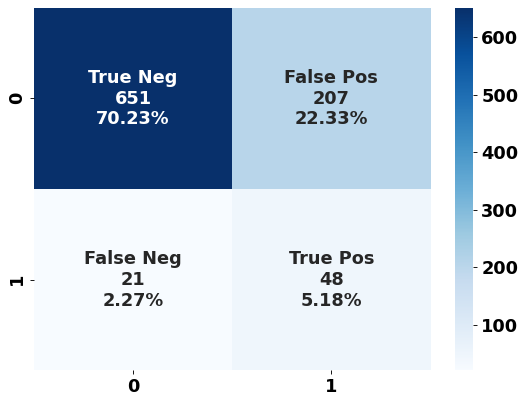

In [51]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
figure(figsize=(8, 6), dpi=80)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [35]:
pip install mplcursors

     |████████████████████████████████| 92kB 3.8MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.4-cp37-none-any.whl size=19969 sha256=a6eaac4de085032bb165d693faff4c8bb165f99eeaf7d2a65c6fbac36592d853
  Stored in directory: /root/.cache/pip/wheels/d5/ad/ce/d6113f8e662eb231215cbd3d853d09f772d3f0a28fcc2eae25
Successfully built mplcursors


<b>Plotting the ROC-Curve</b>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


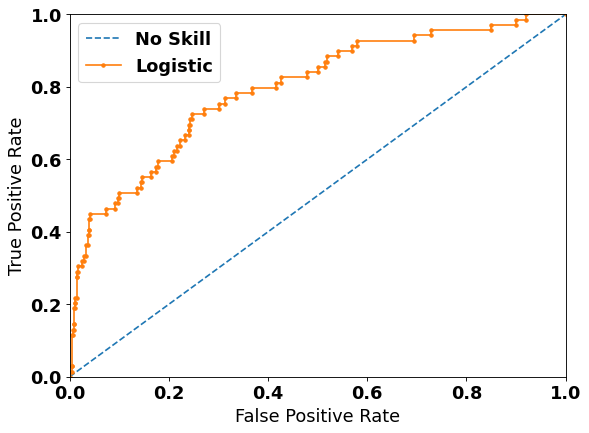

In [36]:
from matplotlib.pyplot import figure
import mplcursors
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
figure(figsize=(8, 6), dpi=80)
plt.xlim(0, 1, )
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr_keras,tpr_keras, marker='.', label='Logistic')
mplcursors.cursor(hover=True)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<b>Ploting the PR-Curve

In [46]:
precision, recall,threshold = precision_recall_curve(y_test.reshape(y_test.shape[0]), model_e2d2.predict(X_test).reshape(-1,1))

In [45]:
auc(lr_recall, lr_precision)

0.3337578872880317

In [47]:
import plotly.express as px
import plotly.graph_objects as go
# from matplotlib.pyplot import figure
fig = go.Figure()
# fig=px.line(x=recall[0:858], y=precision[0:858], hover_name=threshold, width=500, height=500)

# fig1.add_trace(go.Scatter(
#     x=[0, 1],
#     y=[0, 0]
# ))
fig.add_trace(go.Scatter( x=recall[0:858], y=precision[0:858], name='PR', hovertext=threshold))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 0], mode='lines',  name='No Skill'))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(
        title_text="Precision"
    )
)

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(
        title_text="Recall"
    )
)
fig.show()

<b>MultiClass classification Seq2Seq LSTM model tried to achieve best performance results, but unfortunately not achieving good performance records   </b>

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(3, n_features - 1))
# encoder_l1 = tf.keras.layers.LSTM(20,return_sequences = True, return_state=True)
encoder_l1 = tf.keras.layers.LSTM(50, return_sequences=True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
# encoder_l2 = tf.keras.layers.LSTM(25, return_state=True)
encoder_l2 = tf.keras.layers.LSTM(25, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(50, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(25, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4, activation="softmax"))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 3, 6)]       0                                            
__________________________________________________________________________________________________
lstm_20 (LSTM)                  [(None, 3, 50), (Non 11400       input_6[0][0]                    
__________________________________________________________________________________________________
lstm_21 (LSTM)                  [(None, 25), (None,  7600        lstm_20[0][0]                    
__________________________________________________________________________________________________
repeat_vector_5 (RepeatVector)  (None, 1, 25)        0           lstm_21[0][0]                    
____________________________________________________________________________________________

In [ ]:
encoder_inputs = tf.keras.layers.Input(shape=(3, n_features - 1))
# encoder_l1 = tf.keras.layers.LSTM(20,return_sequences = True, return_state=True)
encoder_l1 = tf.keras.layers.LSTM(50, return_sequences=True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
# encoder_l2 = tf.keras.layers.LSTM(25, return_state=True)
encoder_l2 = tf.keras.layers.LSTM(25, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(50, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(25, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4, activation="softmax"))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 3, 6)]       0                                            
__________________________________________________________________________________________________
lstm_20 (LSTM)                  [(None, 3, 50), (Non 11400       input_6[0][0]                    
__________________________________________________________________________________________________
lstm_21 (LSTM)                  [(None, 25), (None,  7600        lstm_20[0][0]                    
__________________________________________________________________________________________________
repeat_vector_5 (RepeatVector)  (None, 1, 25)        0           lstm_21[0][0]                    
____________________________________________________________________________________________

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-7 * 0.90 ** x)
opt = tf.keras.optimizers.Adam(learning_rate=0.01, epsilon=1e-2, clipvalue=0.5)
# sample_weight[y_train.reshape(y_train.shape[0]) == 1] = 15

# model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanAbsoluteError())
# history_e1d1=model_e1d1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=20,verbose=2,callbacks=[reduce_lr], shuffle=False)

model_e2d2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model_e2d2.fit(X_train,y_train1,epochs=1000,validation_data=(X_test,y_test1),batch_size=100,verbose=2, shuffle=False, sample_weight=sample_weight)

Epoch 1/1000
33/33 - 8s - loss: 3.0557 - accuracy: 0.8015 - val_loss: 0.9381 - val_accuracy: 0.9728
Epoch 2/1000
33/33 - 0s - loss: 2.9654 - accuracy: 0.9737 - val_loss: 0.8560 - val_accuracy: 0.9728
Epoch 3/1000
33/33 - 0s - loss: 2.9669 - accuracy: 0.9737 - val_loss: 0.8746 - val_accuracy: 0.9728
Epoch 4/1000
33/33 - 0s - loss: 2.9664 - accuracy: 0.9737 - val_loss: 0.8696 - val_accuracy: 0.9728
Epoch 5/1000
33/33 - 0s - loss: 2.9663 - accuracy: 0.9737 - val_loss: 0.8694 - val_accuracy: 0.9728
Epoch 6/1000
33/33 - 0s - loss: 2.9660 - accuracy: 0.9737 - val_loss: 0.8684 - val_accuracy: 0.9728
Epoch 7/1000
33/33 - 0s - loss: 2.9656 - accuracy: 0.9737 - val_loss: 0.8675 - val_accuracy: 0.9728
Epoch 8/1000
33/33 - 0s - loss: 2.9652 - accuracy: 0.9737 - val_loss: 0.8667 - val_accuracy: 0.9728
Epoch 9/1000
33/33 - 0s - loss: 2.9647 - accuracy: 0.9737 - val_loss: 0.8659 - val_accuracy: 0.9728
Epoch 10/1000
33/33 - 0s - loss: 2.9643 - accuracy: 0.9737 - val_loss: 0.8652 - val_accuracy: 0.9728

Confusion matrix
[[2715   72  112  290]
 [   1   32    0    1]
 [   0    0   25    0]
 [   1    0    0   26]]


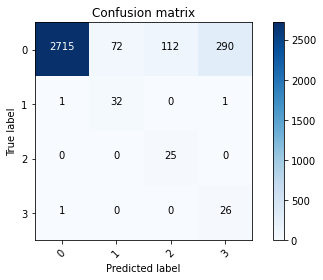

In [ ]:
plot_confusion_matrix(cf_matrix, classes=['0', '1', '2','3'],
                      title='Confusion matrix')

Confusion matrix
[[761   6  20  37]
 [  8   1   0   1]
 [  3   0   0   0]
 [  9   0   1   0]]


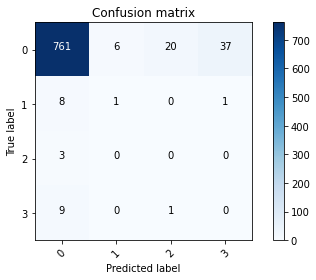

In [ ]:
plot_confusion_matrix(cf_matrix_test, classes=['0', '1', '2','3'],
                      title='Confusion matrix')

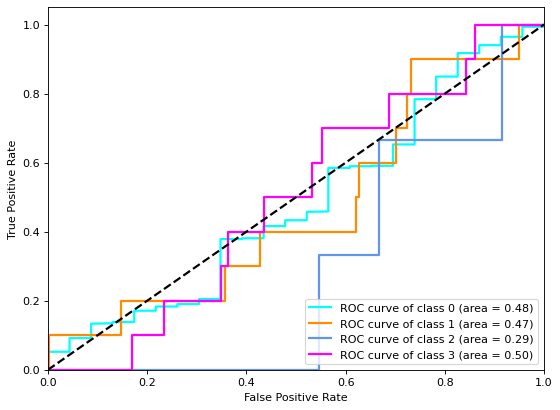

In [ ]:
from itertools import cycle
from matplotlib.pyplot import figure
lw=2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'magenta'])
figure(figsize=(8, 6), dpi=80)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()